## **A. Problem Statement and Dataset**

---
### **Parkinsons Disease**:

* Parkinson's disease is a progressive neurological disorder that affects movement.
* It occurs due to the loss of dopamine-producing neurons in the brain, leading to symptoms like tremors (involuntary, rhythmic shaking movements, most commonly affecting the hands and arms), stiffness, slow movement, and balance problems
* While there is no cure, treatments like medication and therapy can help manage symptoms.
---

#### **1. Importing Libraries**

In [1]:
# Importing Libraries
# Basic Python Libraries
import pandas as pd
import numpy as np

In [2]:
# Data visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler

In [4]:
# Statistical Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# train test split
from sklearn.model_selection import train_test_split

In [6]:
# linear regression library
from sklearn.linear_model import LinearRegression

In [7]:
# Model evaluation libraries
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# OLS package
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

In [9]:
import statsmodels.formula.api as smf

In [10]:
import scipy.stats as stats

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

In [12]:
# Regularization Libraries
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

#### **2. Reading Data**

In [13]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/1.2. parkinsons_updrs.csv')
df = df[:5875]
df.head()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1.0,72.0,0.0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1.0,72.0,0.0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1.0,72.0,0.0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1.0,72.0,0.0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1.0,72.0,0.0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


<font color = Blue>

* The data corresponds to 42 individual who have been monitored for 6 months, and observations are taken over a given time interval.
* Here there are two Response Varibales, namely "Motor_UTDRS", "Total_UTDRS" and there are 16 Predictor variables (biomedical voice measures).
* UPDRS stands for Unified Parkinson’s Disease Rating Scale.
* There are around 200 observations per patient.</font>

#### **<u>Features</u>**:
* **Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP**: Measures of vocal jitter, which is a variation in fundamental frequency (pitch) from one cycle to the next. These are often used in voice analysis, potentially related to speech impairments.
* **Shimmer, Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA**: Measures of vocal shimmer, which is a variation in amplitude (loudness) from one cycle to the next. Also used in voice analysis.
* **NHR**: Noise-to-Harmonics Ratio, a measure of the amount of noise in the voice signal.
* **HNR**: Harmonics-to-Noise Ratio, the inverse of NHR, representing the amount of harmonic (periodic) energy relative to noise.
* **RPDE**: Recurrence Period Density Entropy, a measure of non-linear dynamics in voice.
* **DFA**: Detrended Fluctuation Analysis, a measure of fractal-like scaling properties in voice.
* **PPE**: Pitch Period Entropy, another measure of non-linear dynamics in voice.

In [ ]:
df.tail()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42.0,61.0,0.0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42.0,61.0,0.0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42.0,61.0,0.0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42.0,61.0,0.0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42.0,61.0,0.0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [ ]:
df.shape

(5875, 22)

In [ ]:
# Columns of the dataset
print("Columns: \n")
j = 1
for i in df.columns:
  print(f"{j}. {i}")
  j = j + 1

Columns: 

1. subject
2. age
3. sex
4. test_time
5. motor_UPDRS
6. total_UPDRS
7. Jitter(%)
8. Jitter(Abs)
9. Jitter:RAP
10. Jitter:PPQ5
11. Jitter:DDP
12. Shimmer
13. Shimmer(dB)
14. Shimmer:APQ3
15. Shimmer:APQ5
16. Shimmer:APQ11
17. Shimmer:DDA
18. NHR
19. HNR
20. RPDE
21. DFA
22. PPE


# **B. Exploratory Data Analysis**

#### **1. Checking for missing and duplicate values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   float64
 1   age            5875 non-null   int32  
 2   sex            5875 non-null   int32  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

* **There is no Missing value in the data.**
* **There are no categorical features, other than sex.**

In [ ]:
print(df.duplicated().sum())

0


* **There are no duplicated values.**

#### **2. Summary Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000034,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


* **Sex Distribution**: The mean for "sex" is 0.317787, indicating a possible imbalance in the dataset.   



#### **3. Distribution of features**

In [ ]:
# Setting style
sns.set_style("whitegrid")

# Histogram for numerical features
df.iloc[:,1:].hist(figsize=(16, 10), bins=30, edgecolor='black')
plt.show()

NameError: name 'sns' is not defined

#### **4. Box Plots**

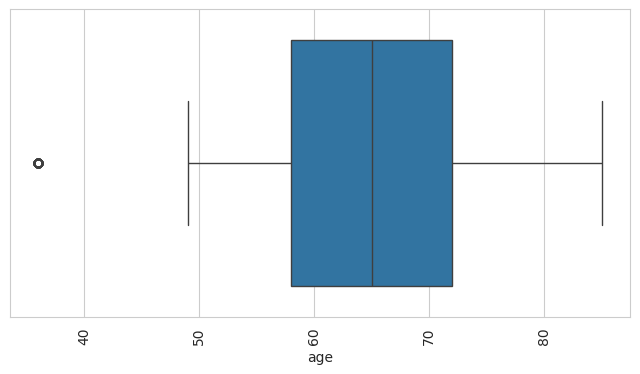

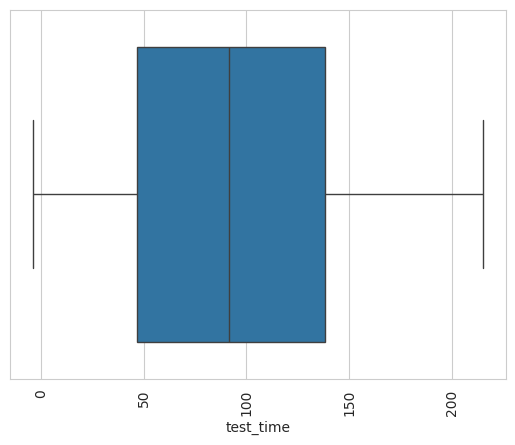

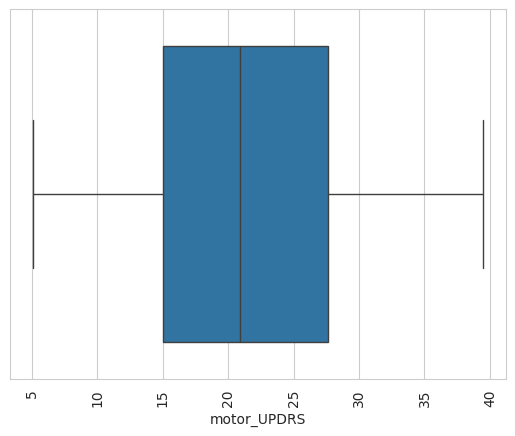

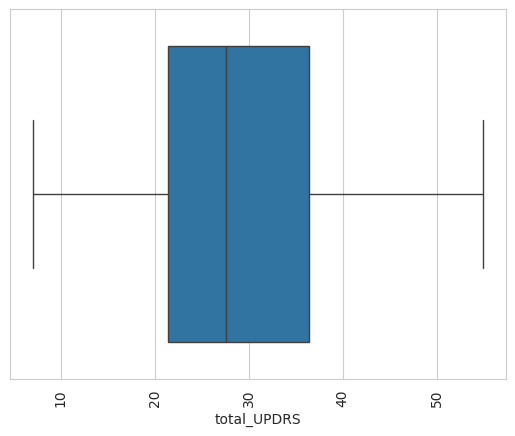

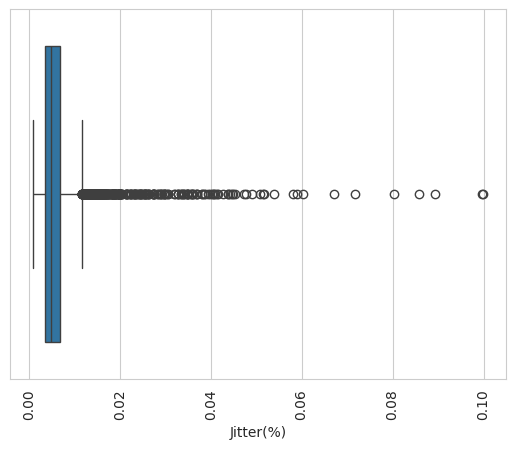

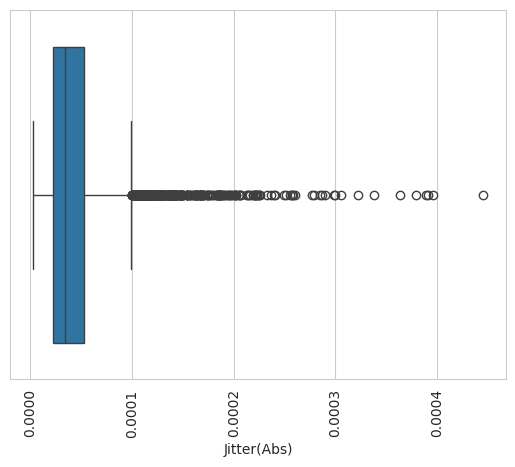

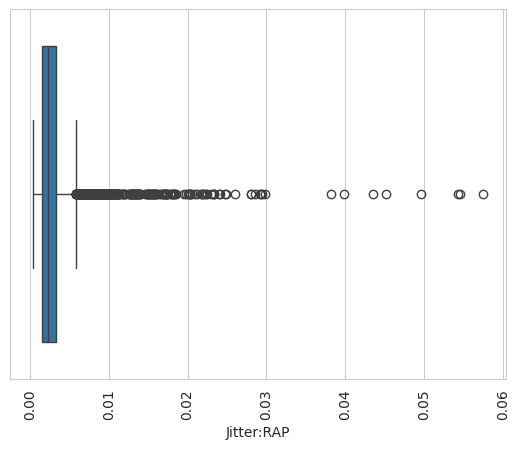

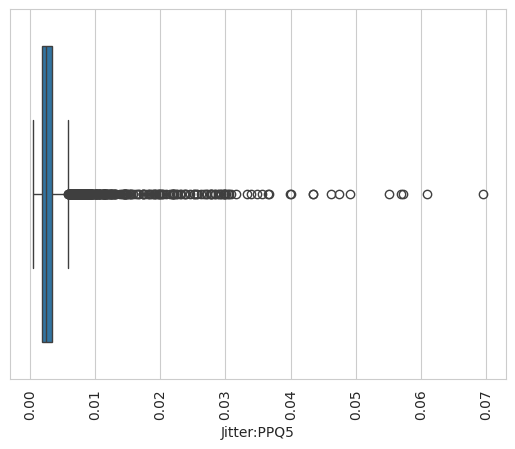

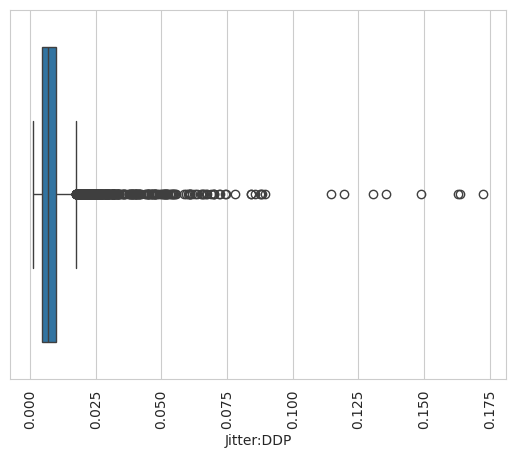

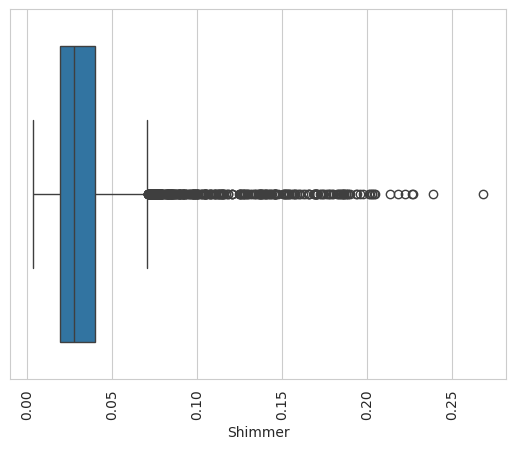

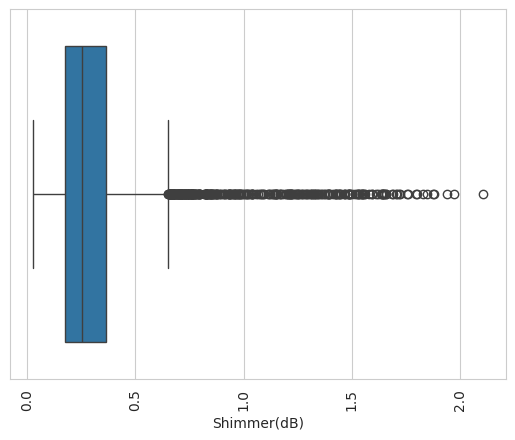

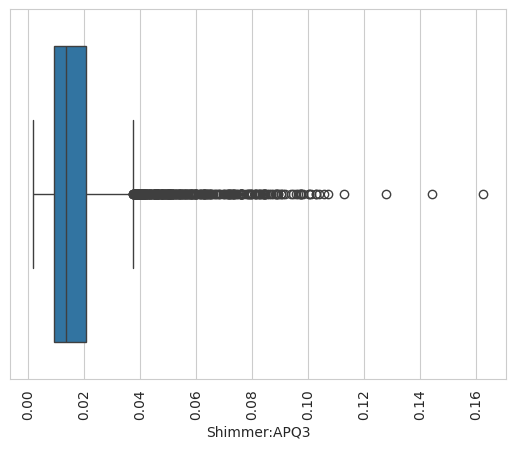

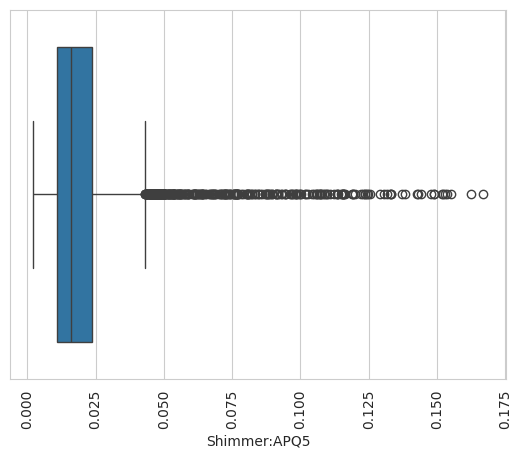

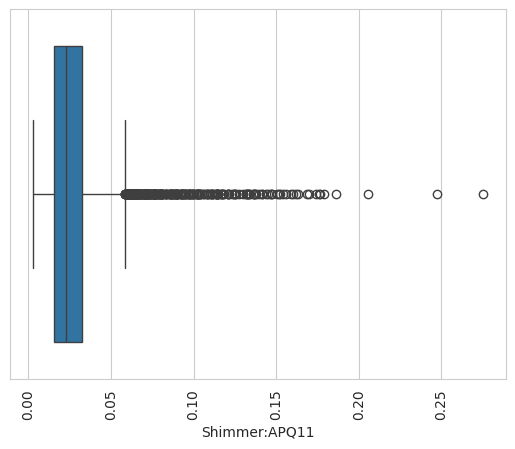

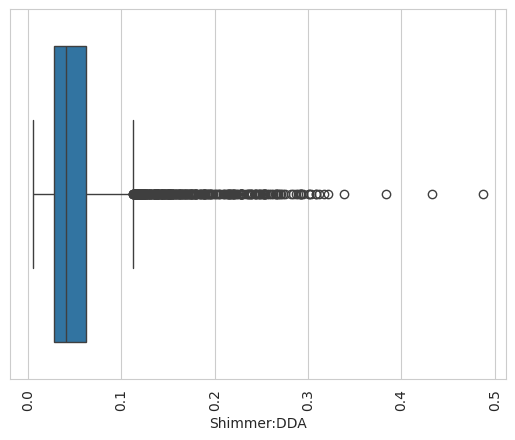

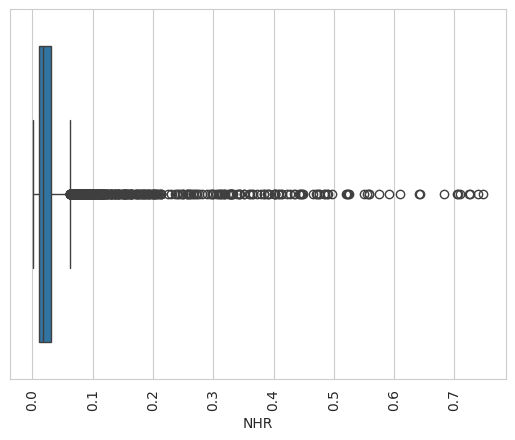

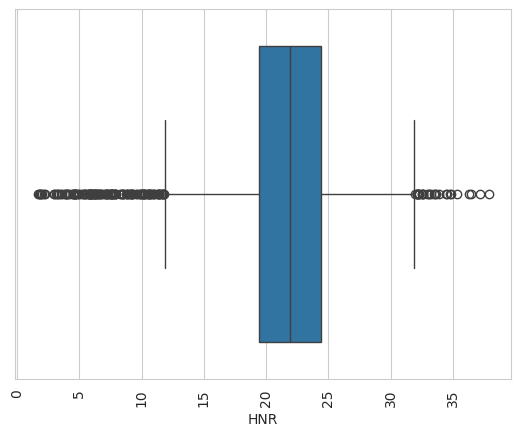

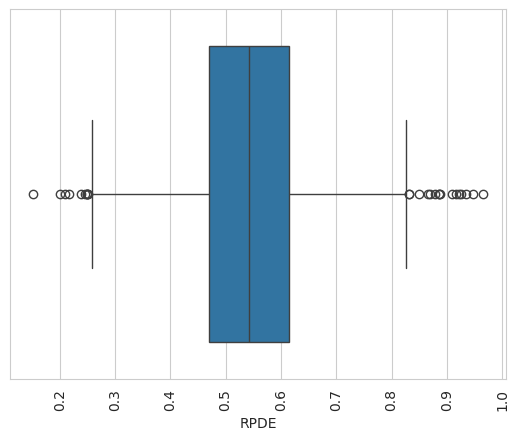

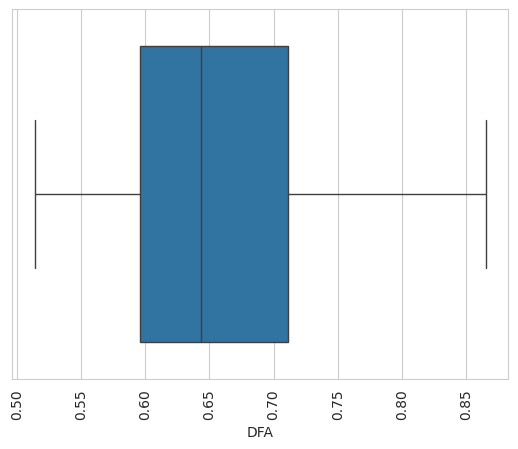

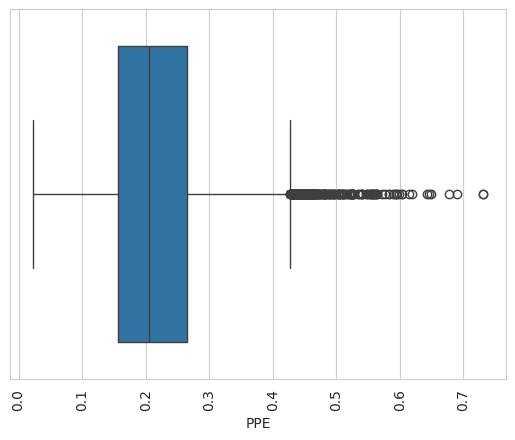

In [ ]:
plt.figure(figsize=(8,4))
columns = ['motor_UPDRS', 'total_UPDRS', 'age', 'sex', 'test_time',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
for column in columns:
    sns.boxplot(x=df[column])
    plt.xticks(rotation=90)
    # plt.title("Boxplot for Outlier Detection")
    plt.show()

#### **5. Pair Plots**

In [ ]:
sns.pairplot(df.iloc[:,1:])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **C. Preprocessing**

#### **1. Extracting the Predictors**

In [14]:
X = df[['age', 'sex', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
              'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]

#### **2. Feature Scaling**

In [15]:
scaler = StandardScaler()

In [16]:
# Scaling the features and converting them into a DF
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# **D. Identifying Multicollinearity**

#### **1. Covariance (R) Matrix Approach**

In [ ]:
R = X_scaled.cov()
R

,age,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
age,1.000170,-0.041609,0.023075,0.035691,0.010257,0.013202,0.010260,0.101571,0.111149,0.098929,0.089998,0.135261,0.098930,0.007094,-0.104860,0.090224,-0.092886,0.120810
sex,-0.041609,1.000170,0.051430,-0.154687,0.076731,0.088010,0.076716,0.058746,0.056490,0.044945,0.064830,0.023364,0.044945,0.168198,-0.000167,-0.159290,-0.165142,-0.099918
Jitter(%),0.023075,0.051430,1.000170,0.865721,0.984348,0.968379,0.984351,0.709912,0.716826,0.664262,0.694120,0.646075,0.664261,0.825434,-0.675303,0.427200,0.226589,0.721972
Jitter(Abs),0.035691,-0.154687,0.865721,1.000170,0.844766,0.790668,0.844770,0.649152,0.655978,0.623932,0.621502,0.590092,0.623929,0.700073,-0.706540,0.547190,0.352324,0.787983
Jitter:RAP,0.010257,0.076731,0.984348,0.844766,1.000170,0.947357,1.000170,0.681845,0.685667,0.650337,0.659944,0.603184,0.650335,0.792508,-0.641582,0.382956,0.214918,0.670766
Jitter:PPQ5,0.013202,0.088010,0.968379,0.790668,0.947357,1.000170,0.947364,0.732872,0.734716,0.676827,0.734146,0.668527,0.676825,0.865011,-0.662522,0.381568,0.175388,0.663604
Jitter:DDP,0.010260,0.076716,0.984351,0.844770,1.000170,0.947364,1.000170,0.681850,0.685673,0.650339,0.659946,0.603193,0.650337,0.792512,-0.641591,0.382951,0.214930,0.670775
Shimmer,0.101571,0.058746,0.709912,0.649152,0.681845,0.732872,0.681850,1.000170,0.992503,0.979995,0.985072,0.935616,0.979994,0.795294,-0.801552,0.468314,0.132563,0.615813
Shimmer(dB),0.111149,0.056490,0.716826,0.655978,0.685667,0.734716,0.685673,0.992503,1.000170,0.968180,0.976539,0.936498,0.968179,0.798213,-0.802633,0.472489,0.126133,0.635271
Shimmer:APQ3,0.098929,0.044945,0.664262,0.623932,0.650337,0.676827,0.650339,0.979995,0.968180,1.000170,0.962887,0.885846,1.000170,0.732861,-0.780830,0.436952,0.130757,0.576802


In [ ]:
# Determinant of R matrix
np.linalg.det(R)

np.float64(9.083739238383477e-27)

* Determinant of the Covariance matrix is almost **0**. Thus, this approach suggests Multicollinearity among the predictor variables.

#### **2. Correlation Matrix (HeatMap)**

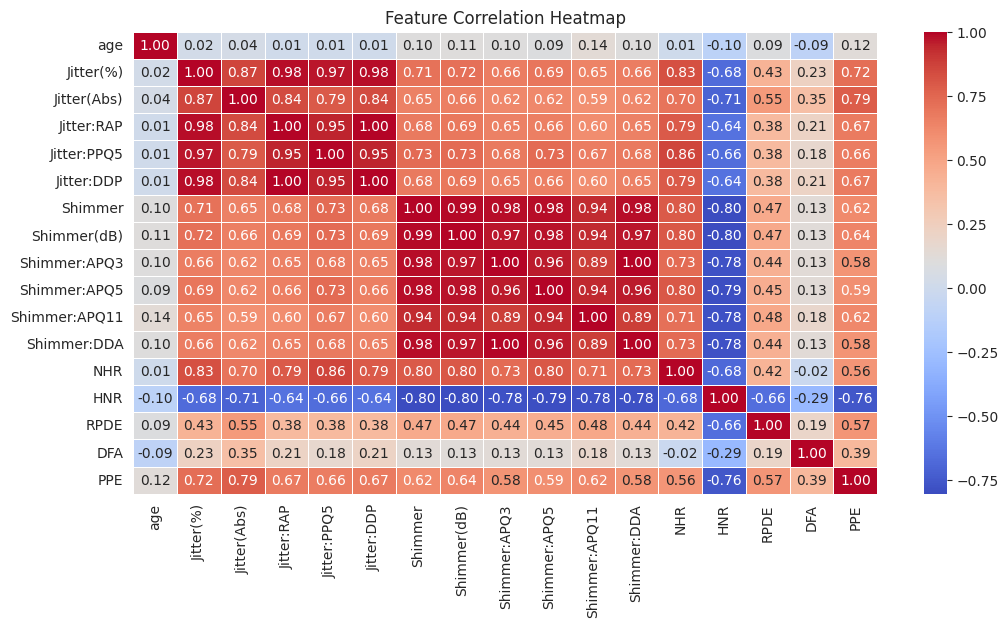

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

* Observing non-diagonal values of this matrix suggests that high multicollinearity among the predictor variables.

#### **3. Variance Inflation factor (VIF)**

VIF can be defined as
* the ith diagonal entry of the inverse of R matrix
* 1/(1-Ri2), where Ri2 is the R-squared from regressing Xi on all other features.

In [ ]:
vif = []

for i in range(X_scaled.shape[1]):
    vif.append(variance_inflation_factor(X_scaled, i))

In [ ]:
for i in vif:
  print(i)

1.0958118315087437
1.348656224494455
88.99095416739856
7.851971501603605
1323849.998529238
30.996612536168538
1324095.2664785585
173.3747769208175
76.84516694322676
23985721.30132719
52.52501680054846
15.281751235670235
23985640.31091986
8.583291217219688
5.416993623074476
2.0994508516126014
1.6601634638237148
4.438181586220238


In [ ]:
VIF = pd.DataFrame({'VIF': vif}, index=X.columns).T
VIF

,age,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
VIF,1.095812,1.348656,88.990954,7.851972,1.323850e+06,30.996613,1.324095e+06,173.374777,76.845167,2.398572e+07,52.525017,15.281751,2.398564e+07,8.583291,5.416994,2.099451,1.660163,4.438182


* A number of columns have VIF > 10 which suggest serious multicollinearity.
* Columns responsible for multicollinearity are:
  1.   Jitter(%),
  2.   Jitter:RAP
  3.   Jitter:PPQ5
  4.   Jitter:DDP
  5.   Shimmer
  6.   Shimmer(dB)
  7.   Shimmer:APQ3
  8.   Shimmer:APQ5
  9.   Shimmer:APQ11
  10.  Shimmer:DDA

#### **4. Condition Numbers (CN)**

* Usual threshold for cond_numb and cond_ind are 50 or 100.
* Check whether we can directly compute these values using np or pd.

In [ ]:
# Obtain eiguen_values of R matrix
eig_val_R, eig_vec_R = np.linalg.eig(R)

In [ ]:
eig_val_R

array([1.12705914e+01, 1.72493386e+00, 1.47157321e+00, 1.00629033e+00,
       7.97645520e-01, 7.19378061e-01, 2.97228046e-01, 2.06754384e-01,
       1.68794413e-01, 1.52606083e-01, 9.90661191e-02, 4.09315622e-02,
       2.02358143e-02, 1.39107619e-02, 8.66588770e-03, 4.45854345e-03,
       2.08491158e-08, 3.77789617e-07])

In [ ]:
CN = eig_val_R.max()/eig_val_R.min()
print(f"Condition Number: {CN}")

Condition Number: 540578865.3736087


* This condition number is so large, even an illerate man can say that there is multicollinearity.

#### **5. Condition Indices**

In [ ]:
cond_ind = eig_val_R.max()/eig_val_R
cond_ind

array([1.00000000e+00, 6.53392668e+00, 7.65887232e+00, 1.12001388e+01,
       1.41298247e+01, 1.56671325e+01, 3.79190036e+01, 5.45119824e+01,
       6.67711160e+01, 7.38541423e+01, 1.13768375e+02, 2.75352094e+02,
       5.56962581e+02, 8.10206618e+02, 1.30056974e+03, 2.52786397e+03,
       5.40578865e+08, 2.98329834e+07])

* Considering 100 to be the cutoff for multicollinearity.
* This approach suggests that **last 8 principal components** are responsible for Multicollinearity.
* It does not say that the last 8 predictors are responsible for multicollinearity.

#### **6. Measure based on variance decomposition**

In [ ]:
# Make a matrix of the eigen vectors of R in decreasing order of the eigen values
eig_vec_R_sorted = eig_vec_R[:, eig_val_R.argsort()[::-1]]
print(eig_vec_R_sorted)

[[ 2.54309752e-02 -1.75789587e-01  2.02093239e-01  8.66538800e-01
  -3.09414754e-01  2.40185443e-01 -1.27859602e-01  3.55050994e-02
  -5.95451502e-02 -3.75520725e-02 -2.52381654e-02 -8.43449204e-04
  -7.03774990e-03 -6.31659189e-03 -1.00161089e-03  9.99485147e-04
   5.03047856e-07  8.79289731e-07]
 [ 9.69763135e-03 -1.98666839e-01 -5.42108348e-01 -7.13373397e-02
  -7.16753029e-01 -3.27740075e-01  1.36559020e-02 -1.27637630e-01
   4.71009609e-02 -1.12121459e-01  7.27325880e-02  6.03075004e-02
   3.83061975e-03  9.99453123e-03  1.33350552e-03 -2.75099418e-03
  -1.20599682e-05 -3.00813800e-07]
 [ 2.66479201e-01  2.62502289e-01 -1.94934177e-01  9.65671058e-02
   3.92896745e-02  5.44439286e-02 -5.85015822e-02  1.87395844e-04
   1.20398398e-01  1.09198044e-01  3.04442808e-03  3.69521962e-02
   1.45199461e-01  1.78607281e-02  8.67281269e-01  5.87634598e-02
  -2.46418797e-05  2.92720977e-05]
 [ 2.49290824e-01  3.15951440e-01  6.49275446e-02  7.14112953e-02
   7.18282768e-02 -1.38861229e-02  9.

In [ ]:
# create a diagonal matrix of eigen values sorted in descending order
#  and find its inverse
eig_val_R_sorted = np.diag(np.sort(eig_val_R)[::-1])
eig_val_R_sorted_inv = np.linalg.inv(eig_val_R_sorted)

In [ ]:
# matrix multiplication
P = (eig_vec_R_sorted.T.dot(eig_val_R_sorted_inv)).dot(eig_vec_R_sorted)

In [ ]:
P = P.T/(vif)

In [ ]:
pd.DataFrame(P.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.326205e+06,2.401768e+06,2.238344e+06,741832.098626,-1.858791e+06,-1.179580e+06,7.666964e+06,308847.326138,2.893231e+06,-730761.488384,-3.252998e+06,-644532.655691,-825086.068389,-183921.807682,-482710.907973,118668.371844,-5.107045e+01,-3.403191e+01
1,1.951488e+06,2.179073e+06,2.055895e+06,396308.462572,-1.840748e+06,-7.722015e+05,6.123753e+06,352368.240425,2.341485e+06,-655098.468857,-2.737907e+06,-565042.912395,-673430.365262,-148217.725674,-395713.828451,92951.874315,-3.712255e+01,-1.549736e+01
2,2.756239e+04,3.115705e+04,2.945011e+04,5073.284780,-2.665047e+04,-1.040292e+04,8.577486e+04,5192.827339,3.287164e+04,-9349.650820,-3.868985e+04,-8036.821862,-9467.857496,-2079.225852,-5567.479511,1297.478134,-5.033220e-01,-3.218021e-01
3,1.035292e+05,6.807002e+04,5.749848e+04,86474.124958,-1.618459e+04,-1.039056e+05,4.141295e+05,-8313.913959,1.490439e+05,-22582.097248,-1.426772e+05,-22930.580752,-41154.991261,-9625.248598,-23670.437219,6843.845014,-3.616961e+00,-9.657855e-01
4,-1.538607e+00,-1.875240e+00,-1.791480e+00,-0.095993,1.720745e+00,4.006553e-01,-4.532934e+00,-0.367137,-1.763976e+00,0.556743,2.167140e+00,0.468796,0.512997,0.111029,0.303135,-0.066959,2.356187e-05,1.556000e-05
5,-4.170125e+04,-3.359833e+04,-2.986669e+04,-26321.065956,1.711179e+04,3.367186e+04,-1.551986e+05,-162.770368,-5.680538e+04,10678.070634,5.780331e+04,10152.232042,15870.870147,3647.784560,9186.051262,-2507.874815,1.231821e+00,4.040025e-01
6,6.345125e+00,6.237344e+00,5.764832e+00,2.455815,-4.532095e+00,-3.633146e+00,2.150288e+01,0.664031,8.055871e+00,-1.912902,-8.856209e+00,-1.711538,-2.286435,-0.513337,-1.334379,0.336334,-1.490038e-04,-7.298583e-05
7,1.952063e+03,2.741019e+03,2.665409e+03,-376.528908,-2.803377e+03,-2.910072e+01,5.071328e+03,671.623858,2.048836e+03,-799.092326,-2.769011e+03,-648.492801,-609.521876,-127.447480,-364.204159,70.391854,-1.558711e-02,4.075506e-02
8,4.125746e+04,4.109378e+04,3.806718e+04,15229.170697,-3.038889e+04,-2.291327e+04,1.388082e+05,4622.495196,5.210203e+04,-12576.152950,-5.761456e+04,-11208.358980,-14805.691255,-3317.943418,-8646.272248,2165.310944,-9.526498e-01,-4.477745e-01
9,-3.338557e-02,-3.683452e-02,-3.468874e-02,-0.007392,3.072848e-02,1.379921e-02,-1.055989e-01,-0.005776,-4.029133e-02,0.011095,4.681662e-02,0.009601,0.011572,0.002552,0.006795,-0.001608,6.329289e-07,4.089904e-07


# **E. Multicollinearity handling**

#### **1. Dimensionality reduction using PCA**

# **F. Base Regression Model**

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['total_UPDRS'], test_size=0.2, random_state=42)

#### **1. Using sikit learn's LinearRegression()**

In [ ]:
base_lr =  LinearRegression()
base_lr.fit(X_train, y_train)
y_pred = base_lr.predict(X_test)

In [ ]:
# r2 score and mae
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.150699787341237
MSE: 94.1135412578258


* The coefficient of determination has turned out to be too little.

#### **2. Using statmodels' OLS**

In [17]:
# Creating the Y
Y = df['total_UPDRS']

# Add constant for intercept
X = sm.add_constant(X_scaled)

# Fit model
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     66.53
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          2.37e-220
Time:                        16:38:11   Log-Likelihood:                -21715.
No. Observations:                5875   AIC:                         4.347e+04
Df Residuals:                    5856   BIC:                         4.359e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.0189      0.127    227.786      0.000      28.769      29.269
age               2.6961      0.133     20.217      0.000       2.435       2.958
sex              -1.2949      0.148     -8.752      0.000      -1.585      -1.005
Jitter(%)         0.4080      1.202      0.339      0.734      -1.948       2.764
Jitter(Abs)      -2.2765      0.357     -6.377      0.000      -2.976      -1.577
Jitter:RAP     -135.2443    146.580     -0.923      0.356    -422.594     152.106
Jitter:PPQ5      -1.1666      0.709     -1.645      0.100      -2.557       0.224
Jitter:DDP      137.5744    146.593      0.938      0.348    -149.802     424.951
Shimmer           3.6130      1.677      2.154      0.031       0.325       6.901
Shimmer(dB)      -1.9094      1.117     -1.710      0.087      -4.099       0.280
Shimmer:APQ3   -247.9127    623.923     -0.397      0.691   -1471.031     975.206
Shimmer:APQ5     -1.2234      0.923     -1.325      0.185      -3.033       0.587
Shimmer:APQ11     1.0529      0.498      2.114      0.035       0.077       2.029
Shimmer:DDA     245.2745    623.921      0.393      0.694    -977.842    1468.391
NHR              -0.8554      0.373     -2.292      0.022      -1.587      -0.124
HNR              -2.6368      0.297     -8.893      0.000      -3.218      -2.056
RPDE              0.3742      0.185      2.027      0.043       0.012       0.736
DFA              -2.1968      0.164    -13.384      0.000      -2.519      -1.875
PPE               1.6430      0.268      6.122      0.000       1.117       2.169
==============================================================================
Omnibus:                      145.140   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.590
Skew:                           0.366   Prob(JB):                     8.94e-33
Kurtosis:                       2.739   Cond. No.                     2.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <u>**Model Performance:**</u>
* **R-squared = 0.170, Adj. R-squared = 0.167**
* The model explains only 17% of the variability in the target variable. Not very strong — there's a lot of variation unaccounted for.

* **F-statistic = 66.53, Prob (F-statistic) = 2.37e-220**
* Statistically significant overall — at least one predictor is meaningfully associated with the outcome.

* These variables are statistically significant in predicting total_UPDRS:
 1. age (coef = 2.6961): Positive association — as age increases, total_UPDRS increases.
 2. sex (coef = -1.2949): Suggests a gender-based difference in total_UPDRS.
 3. Jitter(%), Jitter(Abs): Both show significant positive correlation with UPDRS.
 4. Shimmer, Shimmer(dB): Both significant.
 5. Shimmer:APQ11
 6. NHR, HNR: Highly significant.
 7. RPDE, DFA, PPE

* These variables are likely to contain meaningful signal related to the progression/severity of Parkinson's.

* These variables are not statistically significant:
  1. Jitter:RAP, Jitter:PPQ5, Jitter:DDP
  2. Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA
  
* These could be removed from the model (after further diagnostic tests) to improve model simplicity.

* Durbin-Watson = 0.120 → Suggests **positive autocorrelation** of residuals. Bad sign — could violate OLS assumptions.
* Jarque-Bera test p-value (Prob(JB)) = 8.94e-33 → **Residuals are not normally** distributed.
* Omnibus test p = 0.000 → Again, **residuals are not normal**.

# **G. Residual Analysis using OLS model**

In [24]:
# residuals and fitted values
residuals = model.resid
fitted_vals = model.fittedvalues

#### **1. Linearity and homoscedasticity check**

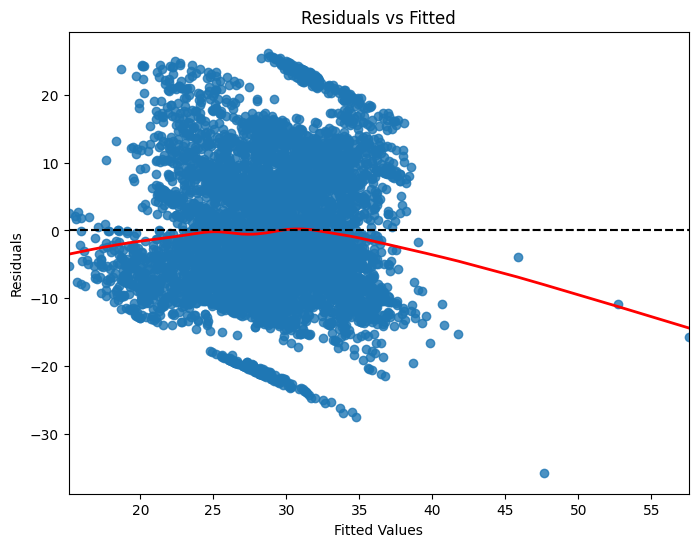

In [25]:
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='black', linestyle='--')
plt.show()

* Non-linearity detected
* The spread of residuals increases slightly as fitted values increase.
* Outliers and patterns:
  * There are visible horizontal lines of clustered residuals, likely due to repeated values or categorical effects.
  * A few strong outliers (far from 0) are present.

#### **2. Normality of Residuals**

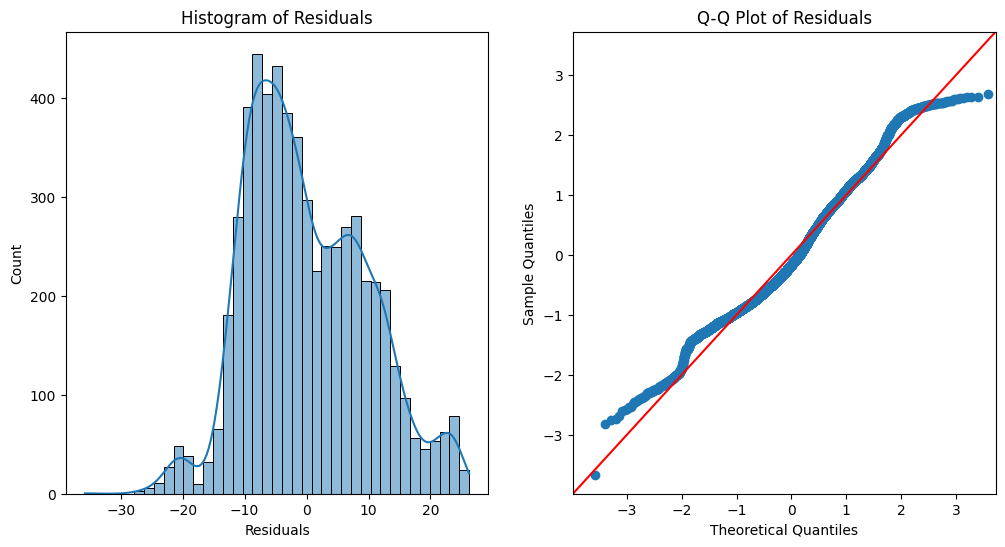

In [26]:
# split plot area into two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Histogram of Residuals")
ax1.set_xlabel("Residuals")

sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot of Residuals")

plt.show()

* Residuals are approximately normal, but Deviations in the tails indicate violations of the normality assumption.

#### **3. Autocorrelation of Residuals**

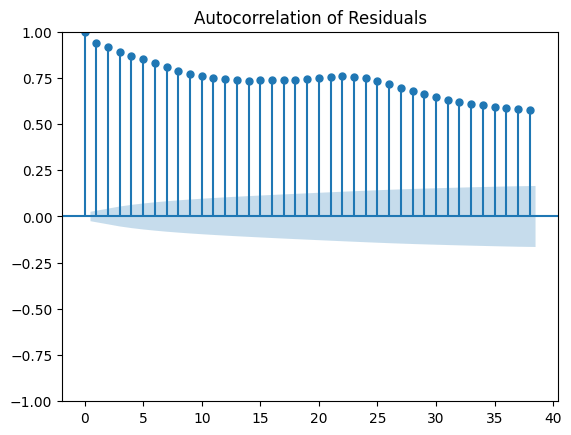

In [27]:
plot_acf(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()

1. **Strong positive autocorrelation**:
  * The autocorrelation starts very close to 1 and decreases gradually.
  * Most lags up to lag 40 are well outside the confidence band (shaded area), meaning they are statistically significant.
2. **Violation of the independence assumption**:
  * Residuals are not independent, which is a major assumption of OLS.
  * This suggests there is time-dependence or sequence structure in your data that the model isn’t capturing.
3. **It is suggested to use tree-based models.**

# **H. Outlier Detection**

In [17]:
# Get influence object
influence = OLSInfluence(model)

#### **1. Cooks' Distance Method**

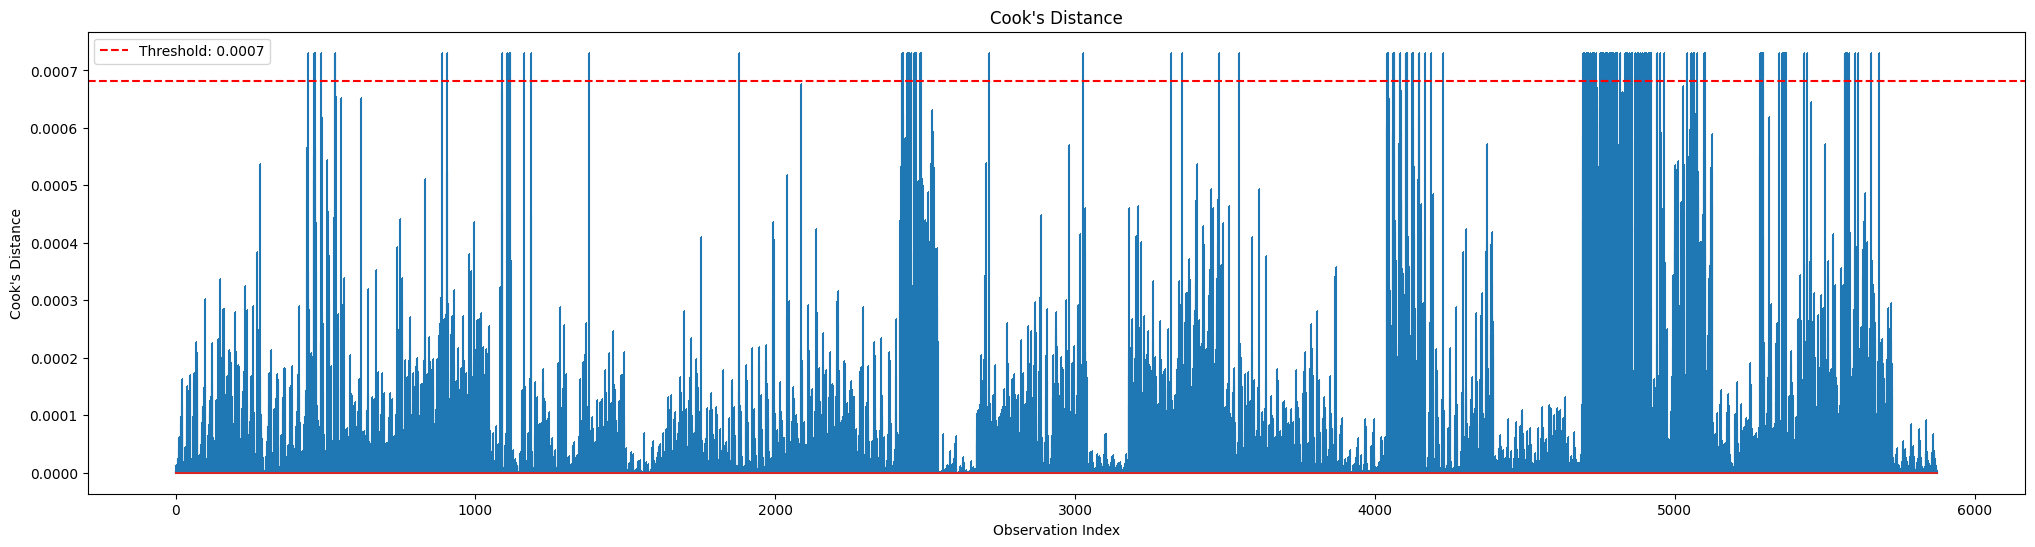

In [33]:
cooks_d = influence.cooks_distance[0]
threshold_cook = 4 / len(X)

cooks_d = cooks_d.apply(lambda x: threshold_cook + 0.00005 if x > threshold_cook else x)

plt.figure(figsize=(25, 6))
plt.stem(cooks_d, markerfmt=",")
plt.axhline(y=threshold_cook, color='red', linestyle='--', label=f'Threshold: {round(threshold_cook, 4)}')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

#### **<u>Insights</u>:**
1. **Threshold** is **0.0007** using the formula for cutoff to be $(4/n)$ instead of taking 1 as threshold.
2. Most points lie well below this value, showing minimal influence
3. Notable **high-influence** spikes at indecies - 1900 (very prominent), 4100, 5300.

#### **2. DFFITS Approach**

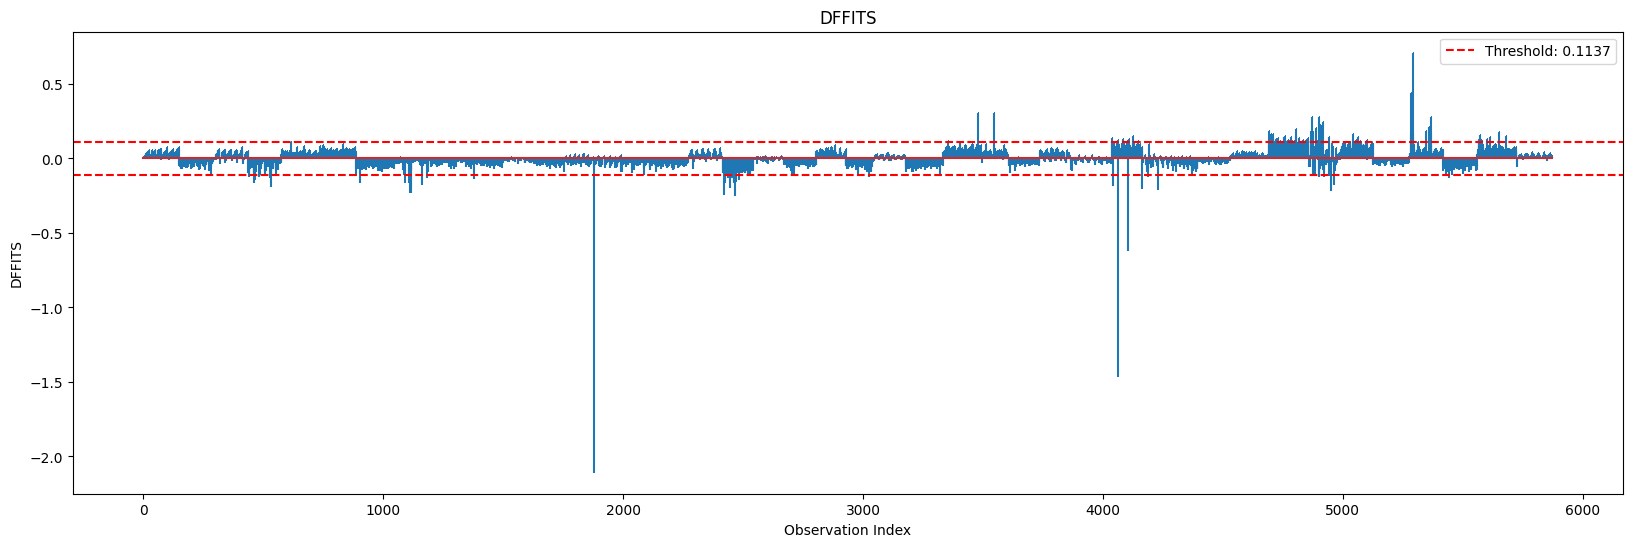

In [30]:
dffits = influence.dffits[0]
threshold_dffits = 2 * np.sqrt(X.shape[1] / len(X))

# dffits = dffits.apply(lambda x: threshold_dffits + 0.01 if x > threshold_dffits else x).apply(lambda x: -threshold_dffits - 0.01 if x < -threshold_dffits else x)

plt.figure(figsize=(20, 6))
plt.stem(dffits, markerfmt=",")
plt.axhline(y=threshold_dffits, color='red', linestyle='--', label=f'Threshold: {round(threshold_dffits, 4)}')
plt.axhline(y=-threshold_dffits, color='red', linestyle='--')
plt.title("DFFITS")
plt.xlabel("Observation Index")
plt.ylabel("DFFITS")
plt.legend()
plt.show()

#### **<u>Insights</u>:**
1. **Threshold**: The dotted line at $±0.1137$ likely represents the conventional cutoff $2*\sqrt(p/n)$.
2. **Interpretation**: Points exceeding the threshold, both positively and negatively are potentially influential (spikes around indices $1900$, $4100$, $5300$).
3. The plot shows a relatively even spread of DFFITS values, with no clusters of high influence.

#### **3. DFBETAs Approach**

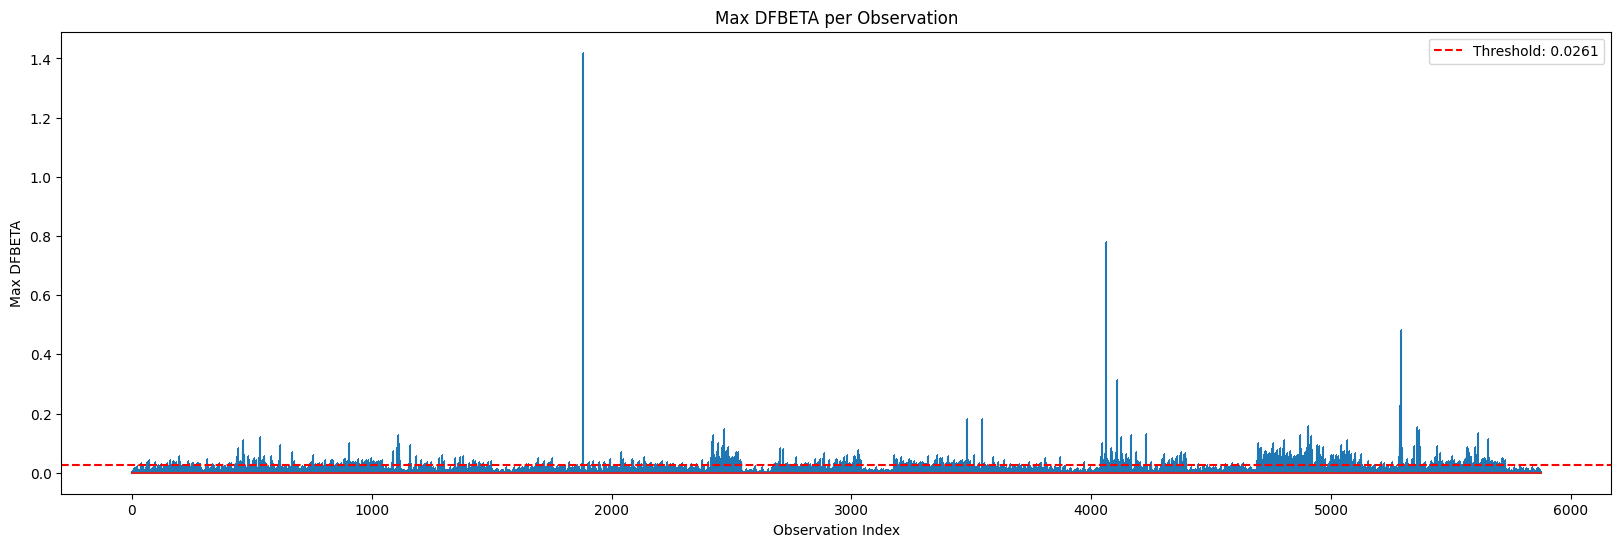

In [34]:
dfbetas = influence.dfbetas
threshold_dfbeta = 2 / np.sqrt(len(X))

# Optional: Check max DFBETA per obs
dfbeta_max = np.max(np.abs(dfbetas), axis=1)

# convert dfbetas to pandas series
dfbeta_max = pd.Series(dfbeta_max)

# dfbeta_max = dfbeta_max.apply(lambda x: threshold_dfbeta + 0.005 if x > threshold_dfbeta else x)

plt.figure(figsize=(20, 6))
plt.stem(dfbeta_max, markerfmt=",")
plt.axhline(y=threshold_dfbeta, color='red', linestyle='--', label=f'Threshold: {round(threshold_dfbeta, 4)}')
plt.title("Max DFBETA per Observation")
plt.xlabel("Observation Index")
plt.ylabel("Max DFBETA")
plt.legend()
plt.show()

#### <u>**Insights**:</u>
1. **Threshold** used: $0.0261$
2. **DFBETA measures how much a predictor coefficient changes when an observation is removed**.
3. Majority of the data points are well below the threshold, indicating stability.
4. A few observations exceed the threshold, notably at indecies: $1900$ (very high, >1.4), $4100$, $5300$.
5. These suggest certain points have a strong effect on specific regression coefficients.

#### **4. COVRATIO Approach**

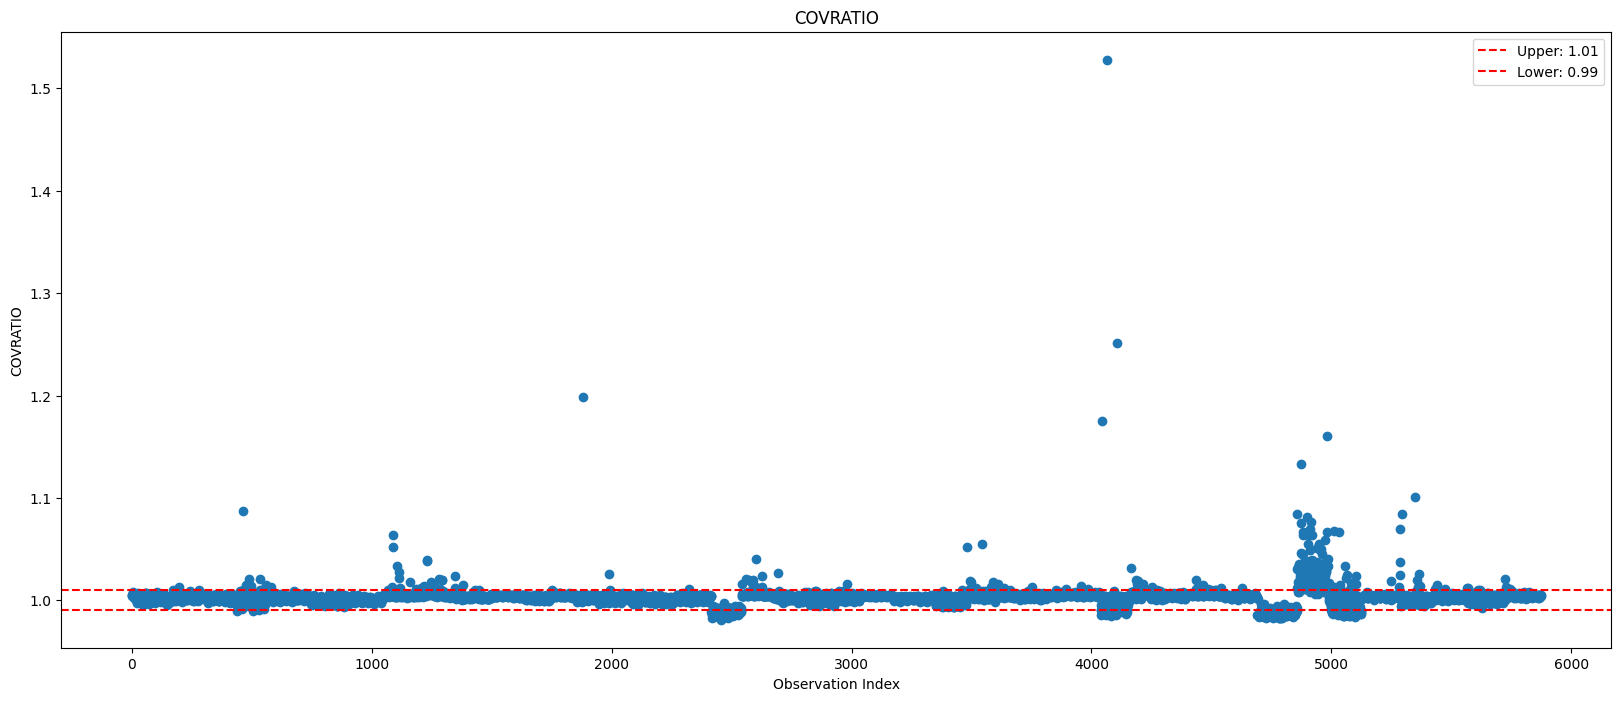

In [35]:
cov_ratio = influence.cov_ratio
p = X.shape[1]
n = X.shape[0]
upper = 1 + 3 * p / n
lower = 1 - 3 * p / n

# convert cov_ratio to pandas series
cov_ratio = pd.Series(cov_ratio)

# cov_ratio = cov_ratio.apply(lambda x: upper + 0.001 if x > upper else x).apply(lambda x: lower - 0.001 if x < lower else x)


plt.figure(figsize=(20, 8))
plt.plot(cov_ratio, 'o')
plt.axhline(y=upper, color='red', linestyle='--', label=f'Upper: {round(upper, 3)}')
plt.axhline(y=lower, color='red', linestyle='--', label=f'Lower: {round(lower, 3)}')
plt.title("COVRATIO")
plt.xlabel("Observation Index")
plt.ylabel("COVRATIO")
plt.legend()
plt.show()

#### <u>**Insights**:</u>
1. **Thresholds** used: **Upper** = $1.01$, **Lower** = $0.99$
2. **COVRATIO assesses how each observation affects the variance-covariance matrix of the regression coefficients**.
3. Most observations fall within the safe range ($0.99 - 1.01$).
4. A few data points lie outside this band, particularly around indices ~1800, ~4100, and ~5000.
5. Some values rise significantly above $1.2$, even exceeding $1.5$, indicating substantial influence on variance.

#### **5. Flagging Potential Outliers**

In [37]:
outliers = pd.DataFrame({
    'Cook': cooks_d > threshold_cook,
    'DFFITS': np.abs(dffits) > threshold_dffits,
    'Max_DFBETA': dfbeta_max > threshold_dfbeta,
    'COVRATIO': (cov_ratio > upper) | (cov_ratio < lower)
})

# How many were flagged
print("Outliers flagged by each method:")
print(outliers.sum())

Outliers flagged by each method:
Cook           146
DFFITS         147
Max_DFBETA    1492
COVRATIO       528
dtype: int64


In [23]:
# Get all rows flagged by any method
suspect_obs = outliers.any(axis=1)
print(f"\nTotal suspect observations: {suspect_obs.sum()}\n")
print("All the flagged outliers are:\n")
# View them
df[suspect_obs]


Total suspect observations: 1630

All the flagged outliers are:



,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
37,1.0,72.0,0.0,96.6340,31.776,41.034,0.00257,0.000017,0.00117,0.00129,...,0.199,0.01146,0.01338,0.01927,0.03438,0.004806,27.847,0.50686,0.62221,0.145190
38,1.0,72.0,0.0,103.6400,32.243,41.657,0.00395,0.000023,0.00158,0.00232,...,0.135,0.00511,0.00637,0.00879,0.01533,0.022641,28.220,0.44028,0.59017,0.246120
48,1.0,72.0,0.0,174.6600,36.977,47.970,0.00369,0.000022,0.00149,0.00183,...,0.222,0.01123,0.01306,0.02232,0.03370,0.010868,25.000,0.49219,0.61602,0.189390
62,1.0,72.0,0.0,96.6340,31.776,41.034,0.00302,0.000018,0.00150,0.00148,...,0.133,0.00676,0.00820,0.01258,0.02027,0.011776,29.131,0.50607,0.61594,0.144460
63,1.0,72.0,0.0,103.6400,32.243,41.657,0.00199,0.000012,0.00090,0.00106,...,0.100,0.00408,0.00505,0.00998,0.01224,0.003882,30.133,0.43008,0.56459,0.084108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,41.0,68.0,1.0,175.5000,34.380,43.104,0.01473,0.000075,0.00827,0.00814,...,0.536,0.02828,0.03226,0.04485,0.08483,0.093820,14.860,0.65047,0.65848,0.385660
5725,42.0,61.0,0.0,-4.2625,19.725,28.633,0.01533,0.000118,0.00774,0.00800,...,0.908,0.05904,0.05315,0.04576,0.17713,0.132810,11.689,0.70273,0.66975,0.484660
5727,42.0,61.0,0.0,9.7104,20.626,29.835,0.01732,0.000108,0.00839,0.00810,...,1.139,0.06688,0.08070,0.08343,0.20065,0.163430,12.365,0.74874,0.66782,0.481500
5735,42.0,61.0,0.0,65.7540,24.242,34.656,0.01460,0.000119,0.00641,0.00607,...,0.701,0.03840,0.03791,0.05507,0.11519,0.120180,14.595,0.70598,0.63275,0.540420


# **I. Outlier Removal and Model Refitting**

* Here we will retrain the model on the outlier-free dataset and on transformed Y. We are applying $square-root$ transformation on Y.

#### **1. Removing Outliers**

In [64]:
# Create cleaned dataset by removing suspect observations
df_cleaned = df[~suspect_obs].reset_index(drop=True)

# Optional: Also clean X and y if you are using them separately
X_cleaned = X[~suspect_obs].reset_index(drop=True)
Y_cleaned = Y[~suspect_obs].reset_index(drop=True)

# Transforming Y_cleaned
Y_cleaned_trans = Y_cleaned ** (1/2)

#### **2. Refitting the OLS model on transformed Y**

In [65]:
model_cleaned = sm.OLS(Y_cleaned_trans, X_cleaned).fit()
model_cleaned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:43:45   Log-Likelihood:                -4201.0
No. Observations:                4245   AIC:                             8440.
Df Residuals:                    4226   BIC:                             8561.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2596      0.014    380.875      0.000       5.233       5.287
age               0.2771      0.011     24.108      0.000       0.255       0.300
sex              -0.1557      0.013    -11.564      0.000      -0.182      -0.129
Jitter(%)        -0.1162      0.137     -0.845      0.398      -0.386       0.153
Jitter(Abs)      -0.2525      0.049     -5.187      0.000      -0.348      -0.157
Jitter:RAP      -31.7130     11.542     -2.748      0.006     -54.340      -9.086
Jitter:PPQ5      -0.1002      0.120     -0.834      0.404      -0.336       0.135
Jitter:DDP       32.3854     11.541      2.806      0.005       9.759      55.012
Shimmer           0.5201      0.277      1.876      0.061      -0.023       1.064
Shimmer(dB)      -0.5694      0.137     -4.145      0.000      -0.839      -0.300
Shimmer:APQ3    -95.4161     49.202     -1.939      0.053    -191.877       1.045
Shimmer:APQ5     -0.3060      0.143     -2.143      0.032      -0.586      -0.026
Shimmer:APQ11     0.3358      0.085      3.965      0.000       0.170       0.502
Shimmer:DDA      95.2569     49.202      1.936      0.053      -1.206     191.719
NHR              -0.1581      0.066     -2.380      0.017      -0.288      -0.028
HNR              -0.2286      0.027     -8.379      0.000      -0.282      -0.175
RPDE              0.1037      0.016      6.356      0.000       0.072       0.136
DFA              -0.3349      0.014    -23.198      0.000      -0.363      -0.307
PPE               0.1079      0.027      3.971      0.000       0.055       0.161
==============================================================================
Omnibus:                      486.205   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.245
Skew:                           0.069   Prob(JB):                     4.29e-30
Kurtosis:                       2.137   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <u>**Model Performance:**</u>
* **R-squared = 0.356, Adj. R-squared = 0.353**
* Slight improvement in explanatory power. Yet not enough too be considered a good model.
* **F-statistic = 129.5, p-value = 0.000**
* The overall model is statistically significant.

* **Condition Number = 1.46e+04**: Indicates potential multicollinearity.
* **Durbin-Watson = 0.248**: Suggests positive autocorrelation in residuals.
* **Omnibus & JB test p-value ≈ 0.000**: Residuals are not normally distributed.
* **Skew = 0.069, Kurtosis = 2.137**: Residuals mildly skewed and light-tailed

# **J. Residual Analysis on Retrained model**

In [66]:
# residuals and fitted values
residuals_cleaned = model_cleaned.resid
fitted_vals_cleaned = model_cleaned.fittedvalues

Linearity and homoscedasticity check:



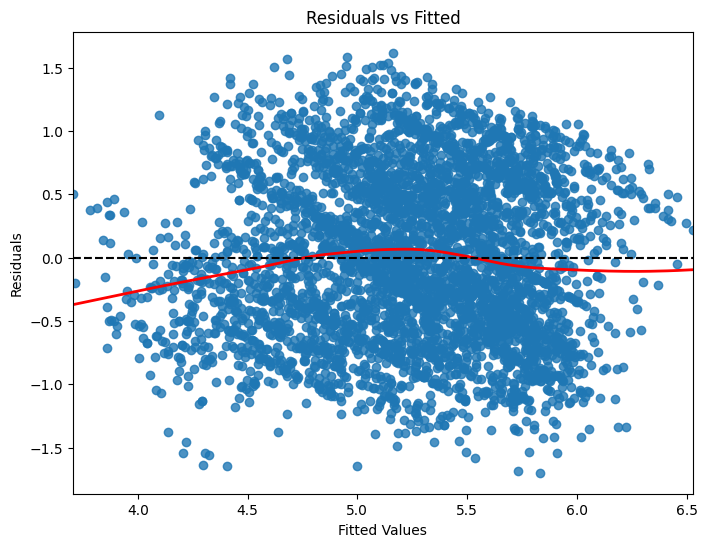

Normality of Residuals check:



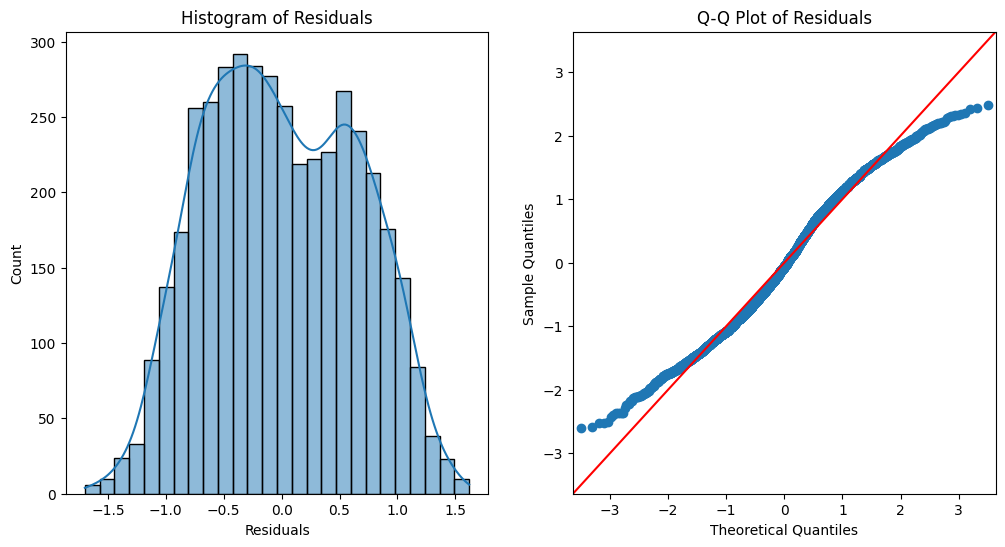

Autocorrelation of Residuals check


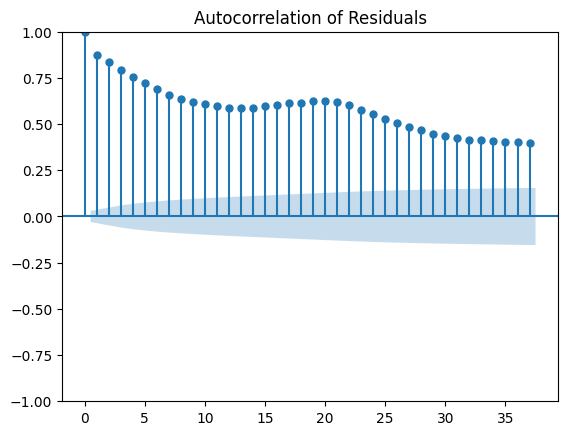

In [67]:

#------------------------------------------
# 1. Linearity and homoscedasticity check
#------------------------------------------
print('Linearity and homoscedasticity check:\n')
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals_cleaned, y=residuals_cleaned, lowess=True,
              line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='black', linestyle='--')
plt.show()


#------------------------------------------
# 2. Normality of Residuals check
#------------------------------------------
print('Normality of Residuals check:\n')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(residuals_cleaned, kde=True, ax=ax1)
ax1.set_title("Histogram of Residuals")
ax1.set_xlabel("Residuals")

sm.qqplot(residuals_cleaned, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot of Residuals")

plt.show()


#------------------------------------------
# 1. Autocorrelation of Residuals check
#------------------------------------------
print('Autocorrelation of Residuals check')
plot_acf(residuals_cleaned)
plt.title('Autocorrelation of Residuals')
plt.show()

* Results obtained are still not satisfactory. Thus we want to see whether results can be improved using Regularization techniques.

# **K. Regularization Techniques**

#### **1. Ridge Regression**

In [32]:
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
model_ridge = ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)

print(f" Ridge R²: {ridge_r2:.4f} | Best alpha: {ridge.alpha_}")

 Ridge R²: 0.1513 | Best alpha: 40.37017258596558


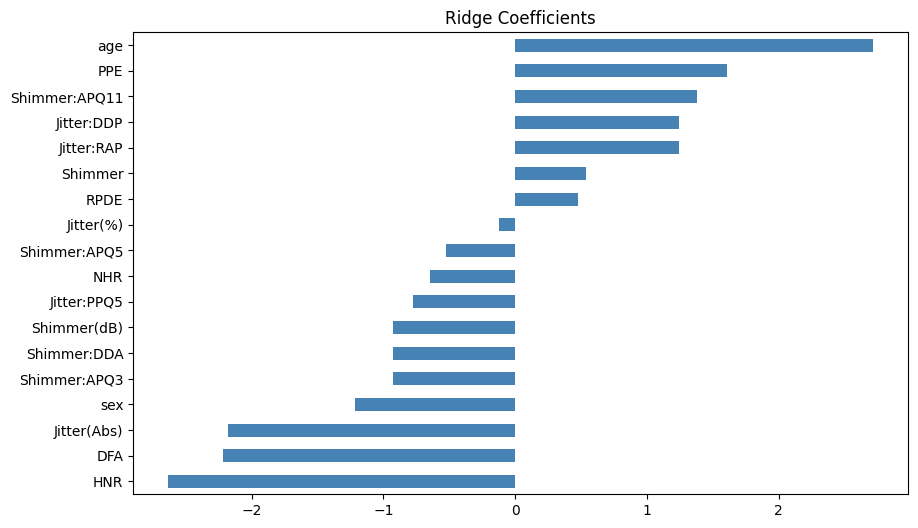

In [33]:
ridge_coef = pd.Series(ridge.coef_, index=X_train.columns)


plt.figure(figsize=(10,6))
ridge_coef.sort_values().plot(kind='barh', color='steelblue', label='Ridge')
plt.title("Ridge Coefficients")
plt.show()

* Top +ve influencers:
  1. age - Most positively influential predictor
  2. PPE - Important voice-based feature increasing UPDRS
  3. shimmer:APQ11, Jitter:DDP, Jitter:RAP - others
* Top -ve influencers:
  1. HNR - Strongest negative effect
  2. DFA & Jitter(Abs) - Also have strong inverse relationships.
  3. sex - Being male seems associated with lower UPDRS.
* Less important predictors like Shimmer:APQ5, Jitter(%) are shrunk close to zero.
* No coefficients are completely zero (unlike Lasso), showing Ridge's coefficient shrinkage but not selection.

* The model captures general trends but misses complex patterns.
* Features from voice measurements (e.g., jitter, shimmer, RPDE, PPE) are crucial indicators of Parkinson’s symptoms.

#### **2. Lasso Regression**

In [37]:
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=10000000)
model_lasso = lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test)

print(f" Lasso R²: {lasso_r2:.4f} | Best alpha: {lasso.alpha_}")

 Lasso R²: 0.1510 | Best alpha: 0.014174741629268055


* R² = 0.1510 → Lasso explains ~15.1% of the variance in total_UPDRS, nearly identical to Ridge.
* Best Alpha = 0.0142 → Very low regularization strength, meaning Lasso didn't penalize much due to weak feature sparsity.
* Performance is still relatively weak, indicating the model may miss non-linear patterns or key variables.

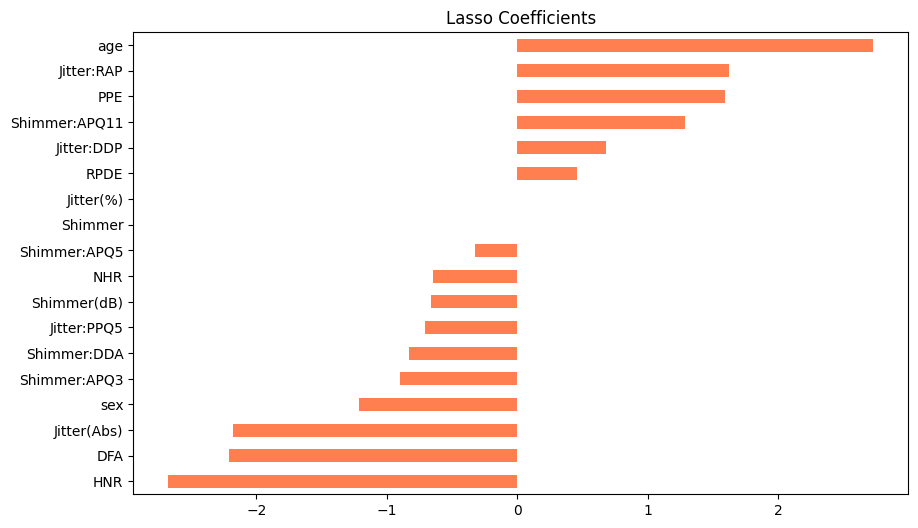

In [38]:
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)

plt.figure(figsize=(10,6))
lasso_coef.sort_values().plot(kind='barh', color='coral', label='Lasso')
plt.title("Lasso Coefficients")
plt.show()

* Lasso shrinks several coefficients to zero (automatic feature selection).
* Features removed include:
  - shimmer:APQ3
  - Shimmer:DDA
  - Jitter:PPQ5
  - Shimmer(dB)
  - NHR
  - Shimmer:APQ5
  - Shimmer
  - These were retained in Ridge but are dropped by Lasso.

* age → Again, most dominant positive predictor of UPDRS.
* PPE, Shimmer:APQ11, Jitter:RAP, Jitter:DDP, RPDE → Features indicating vocal signal instability and signal-to-noise variation are positively linked to symptom severity.
* HNR → Still the strongest negative predictor, consistent with Ridge.
* DFA, Jitter(Abs), sex → Also negatively associated, implying smoother vocal patterns and possibly gender differences in UPDRS.

**Comparison to Ridge**:
* Ridge keeps all features but shrinks them; Lasso eliminates irrelevant ones.
* Despite this, R² is similar, indicating the dropped variables contribute minimally to predictive power.
* Lasso gives a simpler and more interpretable model, useful for identifying key predictors.

* Features related to voice irregularities (**jitter, shimmer, RPDE, PPE**) are crucial indicators of Parkinson's symptoms.
* **age** consistently shows strong influence, confirming disease progression is age-related.